In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplt
pd.set_option('display.max_rows', 1000)

In [2]:
#reading in data
nuts1=gpd.read_file(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\NUTS_Level_1_(January_2018)_Boundaries\NUTS_Level_1_(January_2018)_Boundaries.shp')
gsp=gpd.read_file(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\updated_gsp_regions\gsp_post.shp')
#'C:\Users\jasmine.desmond\Desktop\External_visualisation\gsp_regions_20181031\GSP_regions_20181031.shp')


In [3]:
overlaid=gpd.overlay(nuts1,gsp, how='intersection')

In [4]:
overlaid['area']=overlaid['geometry'].area

In [ ]:
#overlaid_noduplicates=overlaid.groupby(['nuts118nm','GSP(s)'],as_index=False)['area'].sum()

In [ ]:
overlaid[overlaid.duplicated()]

In [ ]:
#this shows that there are no duplicates, so you can just use overlaid without worrying about removing duplicates, as there aren't any
#display(overlaid.shape)
#display(overlaid_noduplicates.shape)

In [ ]:
#display(overlaid_noduplicates)

In [ ]:
#display(overlaid_noduplicates)

In [5]:
grouped=overlaid.groupby(['GSP(s)'],as_index=False)['area'].sum()

In [ ]:
display(grouped)

In [6]:
merged=overlaid.merge(grouped, on='GSP(s)', suffixes=('_individual', '_total'))

In [ ]:
display(merged)

In [7]:
merged['proportion']=merged['area_individual']/merged['area_total']
#display(merged)

In [8]:
small=merged[['nuts118nm','GSP(s)','proportion']]
small=small.round({'proportion': 2})

In [ ]:
#display(small)

In [9]:
d = {}
for i in small['GSP(s)'].unique():
    d[i] = [{small['nuts118nm'][j]: small['proportion'][j]} for j in small[small['GSP(s)']==i].index]

In [10]:
count=0
with open(r"C:\Users\jasmine.desmond\Desktop\External_visualisation\gridsupplypoints2nuts1.json", 'w') as f:
    f.write('%s\n' % ("{"))
    for key, value in d.items():
        count=count+1
        if count!=len(d):
            if len(value)==1:
                f.write('\t"%s":{\n\t\t%s\n\t},\n' % (key,str(value[0]).strip("{}").replace("'", '"')))            
            elif len(value)==2:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s\n\t},\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"')))
            elif len(value)==3:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s,\n\t\t%s\n\t},\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"'),str(value[2]).strip("{}").replace("'", '"')))
            elif len(value)==4:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s,\n\t\t%s,\n\t\t%s\n\t},\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"'),str(value[2]).strip("{}").replace("'", '"'),str(value[3]).strip("{}").replace("'", '"')))
            else:
                print("the length is greater than 4")
        elif count==len(d):
            if len(value)==1:
                f.write('\t"%s":{\n\t\t%s\n\t}\n' % (key,str(value[0]).strip("{}").replace("'", '"')))            
            elif len(value)==2:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s\n\t}\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"')))
            elif len(value)==3:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s,\n\t\t%s\n\t}\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"'),str(value[2]).strip("{}").replace("'", '"')))
            elif len(value)==4:
                f.write('\t"%s":{\n\t\t%s,\n\t\t%s,\n\t\t%s,\n\t\t%s\n\t}\n' % (key,str(value[0]).strip("{}").replace("'", '"'),str(value[1]).strip("{}").replace("'", '"'),str(value[2]).strip("{}").replace("'", '"'),str(value[3]).strip("{}").replace("'", '"')))
            else:
                print("the length is greater than 4")           
    f.write('%s' % ("}")) 

In [11]:
temp1=overlaid[['nuts118nm','GSP(s)','geometry']][overlaid[['nuts118nm','GSP(s)']].duplicated(keep=False)]
temp1=temp1.sort_values(by='GSP(s)')
display(temp1)

,nuts118nm,GSP(s),geometry


In [12]:
gsp['area']=gsp['geometry'].area
sgsp=gsp.groupby(['GSP(s)'],as_index=False)['area'].sum()
checking_areas=sgsp.merge(grouped, on='GSP(s)', suffixes=('_before', '_after'))
checking_areas['difference']=checking_areas['area_before']-checking_areas['area_after']
checking_areas['percent difference']=(checking_areas['difference']/checking_areas['area_before'])*100
display(checking_areas)
display(checking_areas['difference'].max())
display(checking_areas['percent difference'].max())

,GSP(s),area_before,area_after,difference,percent difference
0,ABHA1,1.562739e+09,1.454615e+09,1.081242e+08,6.918887e+00
1,ABNE_P,6.593032e+08,6.481516e+08,1.115157e+07,1.691417e+00
2,ABTH_1,2.586670e+08,2.386409e+08,2.002615e+07,7.742058e+00
3,ACTL_2;CBNK_H;GREE_H;PERI_H,1.882578e+07,1.882578e+07,0.000000e+00,0.000000e+00
4,ALNE_P,7.265321e+08,6.218936e+08,1.046385e+08,1.440246e+01
5,ALVE1,3.334727e+09,3.251146e+09,8.358054e+07,2.506368e+00
6,AMEM_1,2.485978e+08,2.485978e+08,-5.960464e-08,-2.397634e-14
7,ARBR_P,1.901575e+08,1.745953e+08,1.556224e+07,8.183868e+00
8,ARDK_P;CLAC_P,4.783052e+08,4.456509e+08,3.265428e+07,6.827080e+00
9,ARMO_P,4.230227e+09,3.091182e+09,1.139045e+09,2.692633e+01


1139045049.5939946

75.72873851376161

<AxesSubplot:>

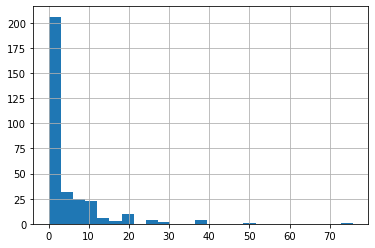

In [13]:
checking_areas['percent difference'].hist(bins=25)


In [14]:
nuts1_regions_list=overlaid['nuts118nm'].unique()

In [ ]:
display(len(nuts1_regions_list))

In [15]:
color_list=['magenta','springgreen','yellow','cyan','midnightblue','lavender','darkorange','red','blue','peachpuff','forestgreen']

Scotland
North West (England)
Yorkshire and The Humber
Wales
East Midlands (England)
West Midlands (England)
South East (England)
South West (England)
East of England
London


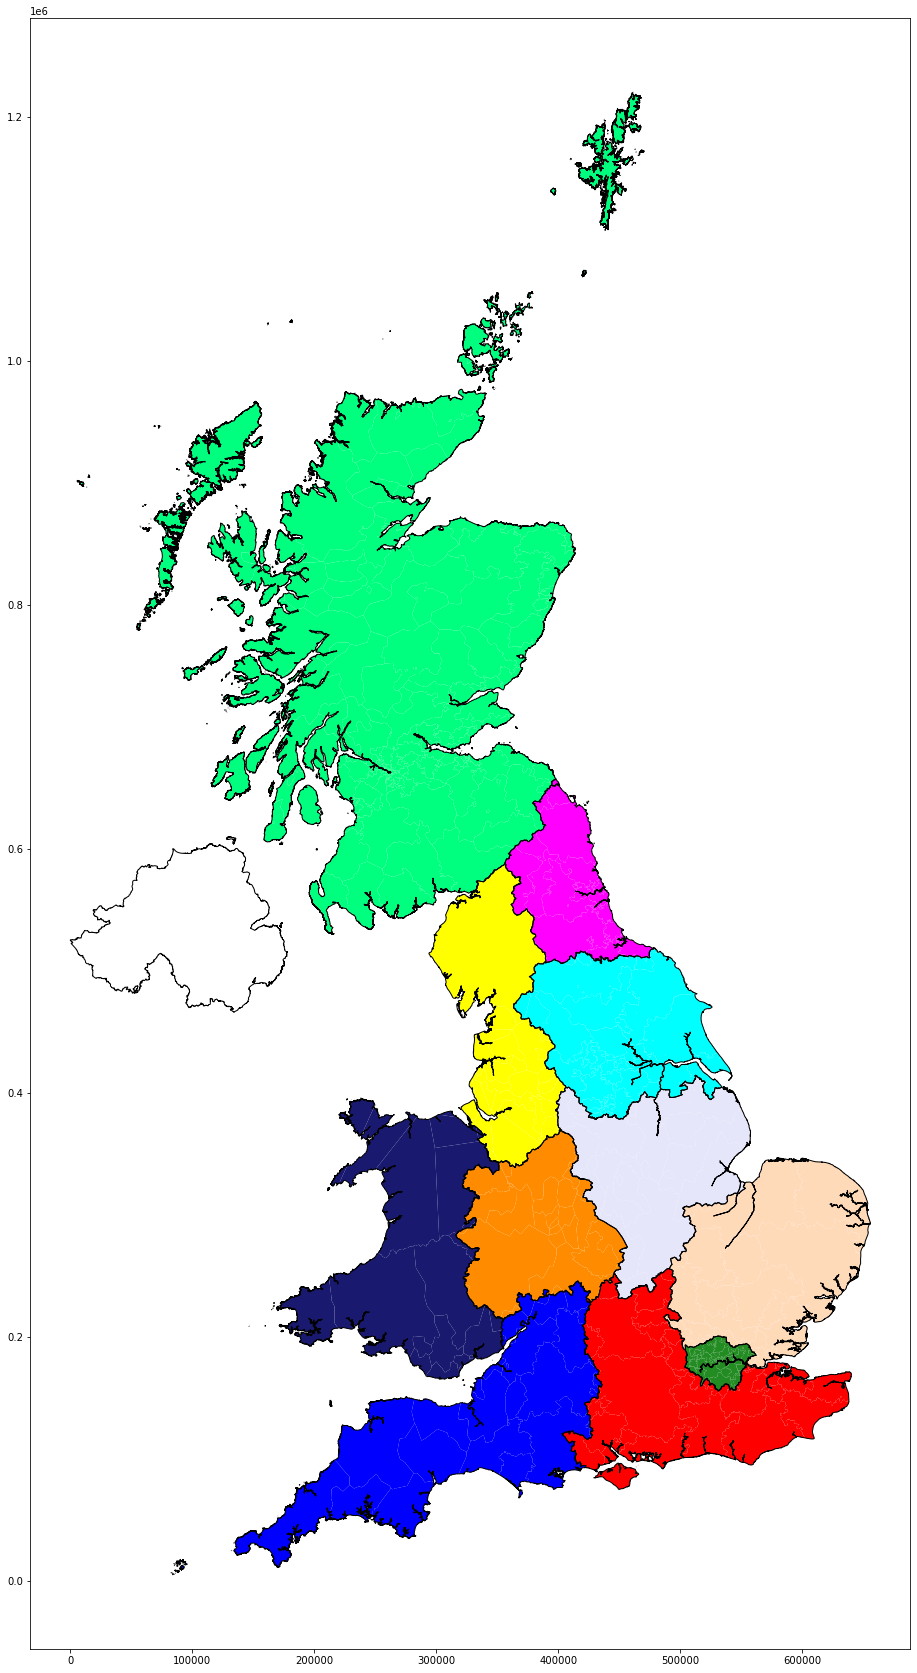

In [16]:
color_index=0
ax = overlaid[overlaid['nuts118nm']==nuts1_regions_list[0]].plot(color=color_list[color_index],figsize=(30,30))
color_index=color_index+1
for region in nuts1_regions_list[1:]:
    print(region)
    overlaid[overlaid['nuts118nm']==region].plot(ax=ax, color=color_list[color_index],figsize=(30,30))
    color_index=color_index+1
nuts1['geometry'].plot(ax=ax, facecolor='none', edgecolor='k',figsize=(30,30))
pyplt.savefig(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\images'+'\\'+r'combined_regions_overlap.png')
pyplt.show()

North East (England)


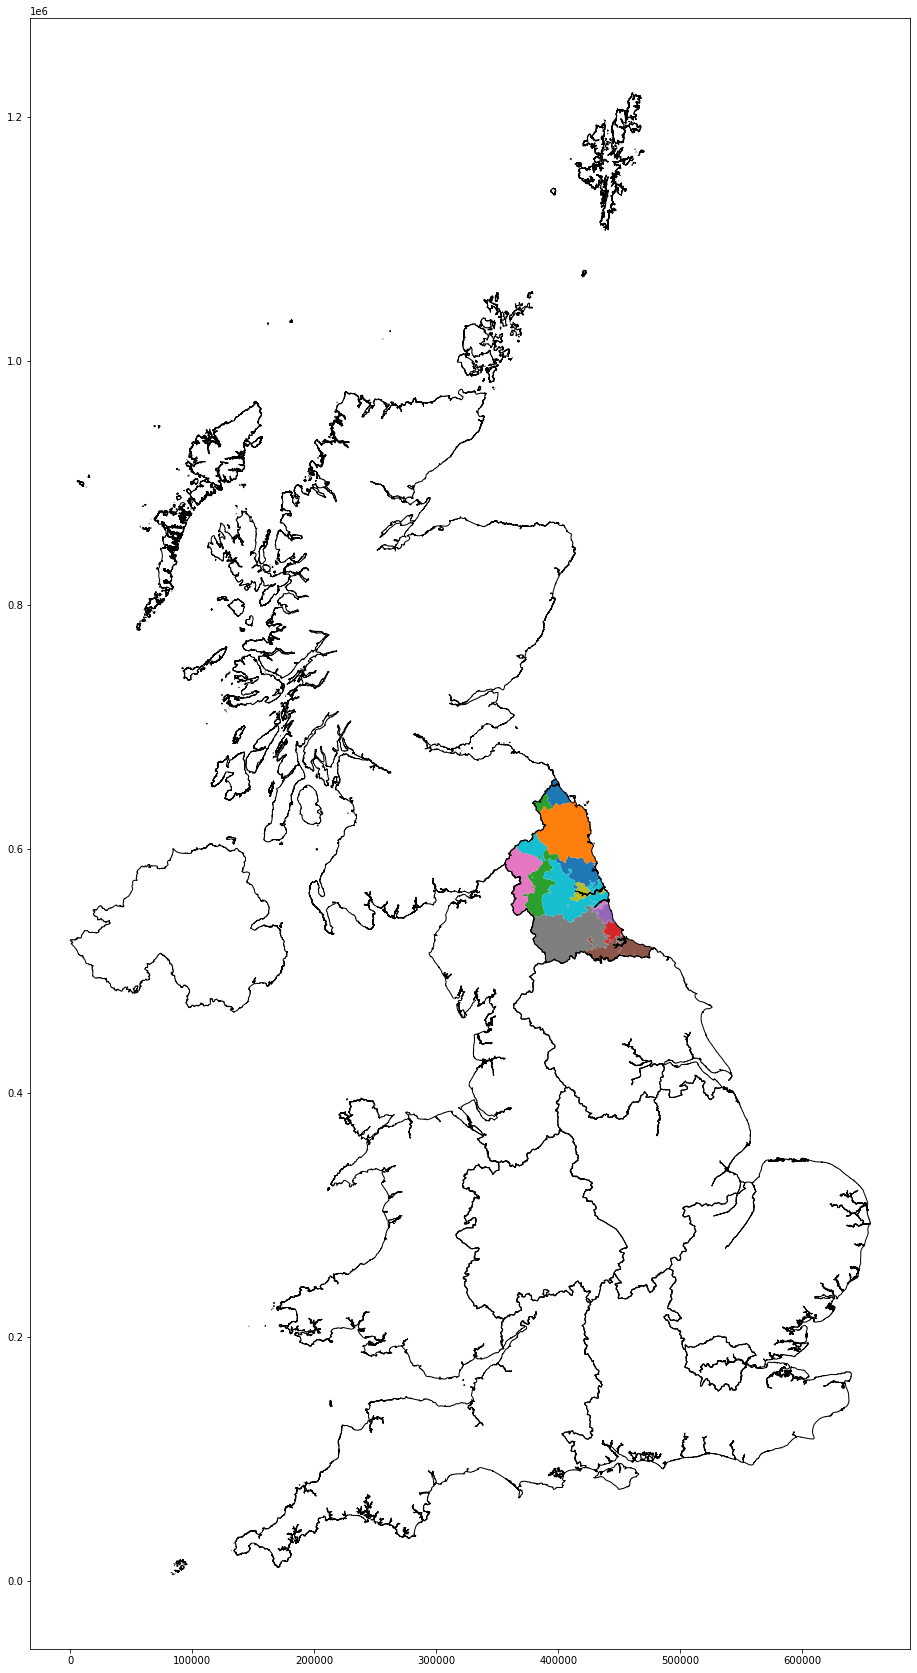

Scotland


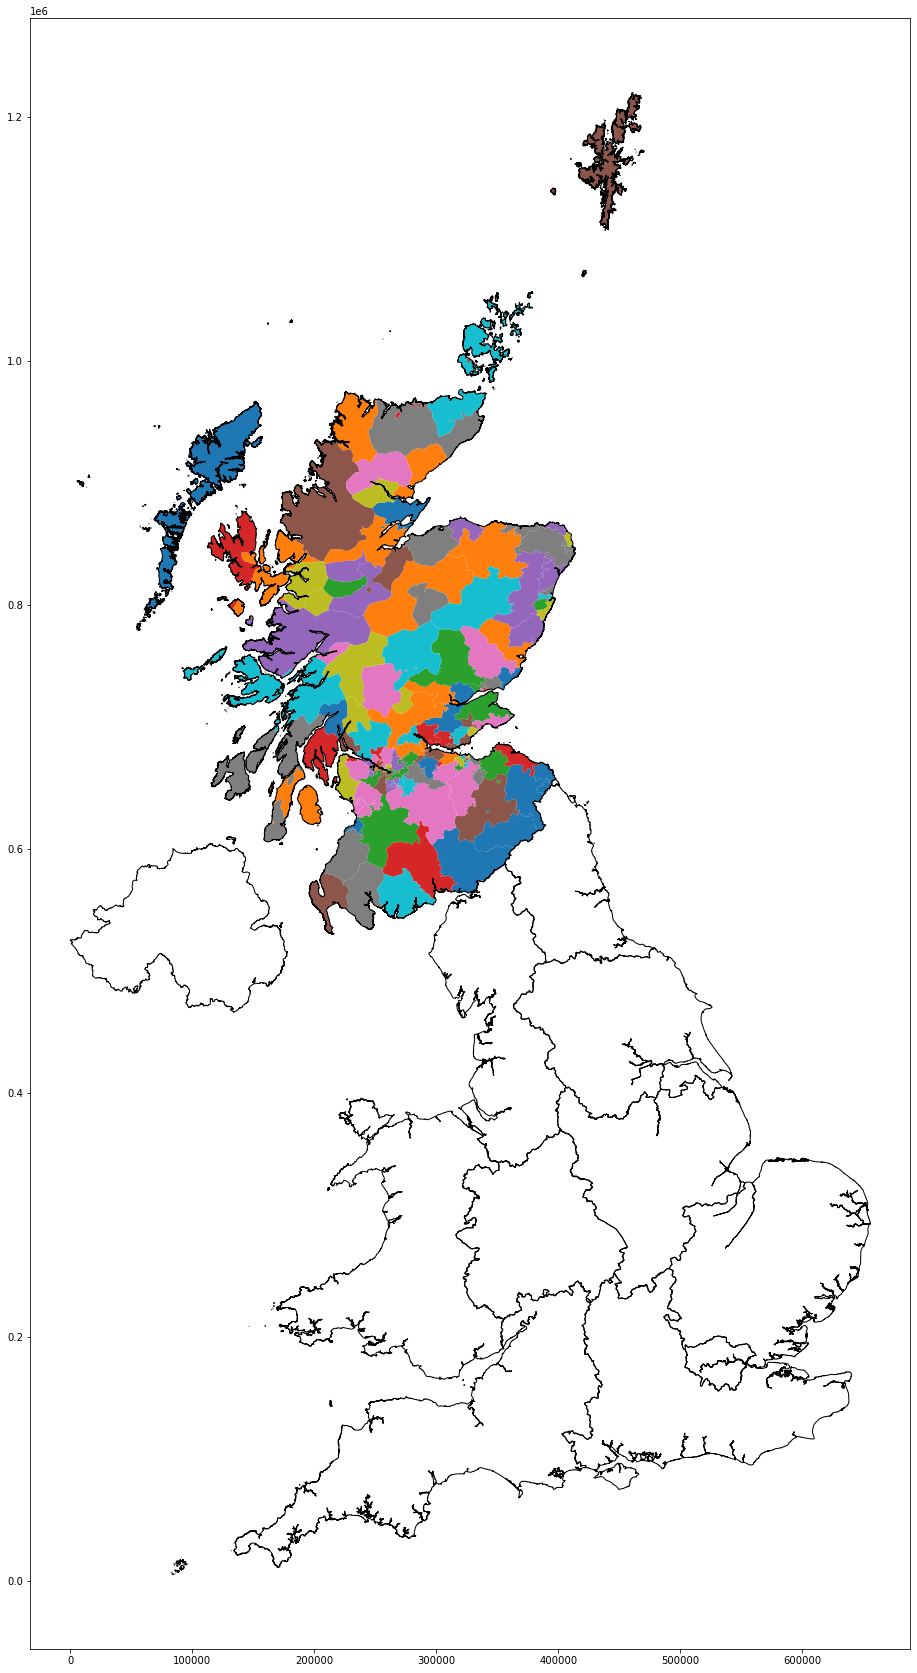

North West (England)


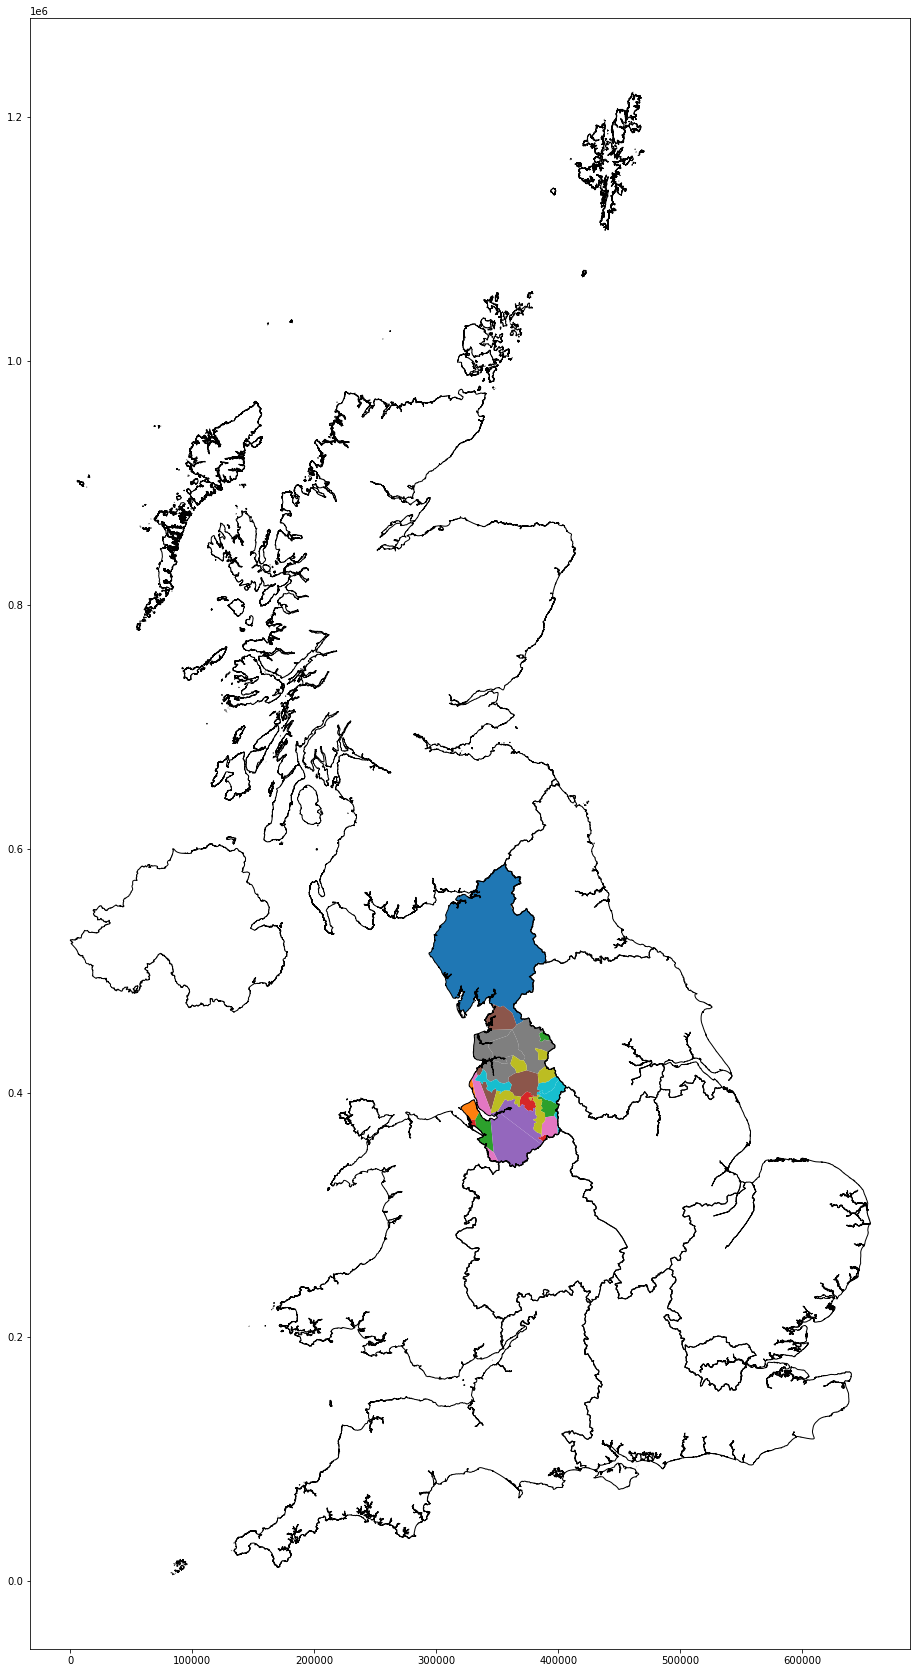

Yorkshire and The Humber


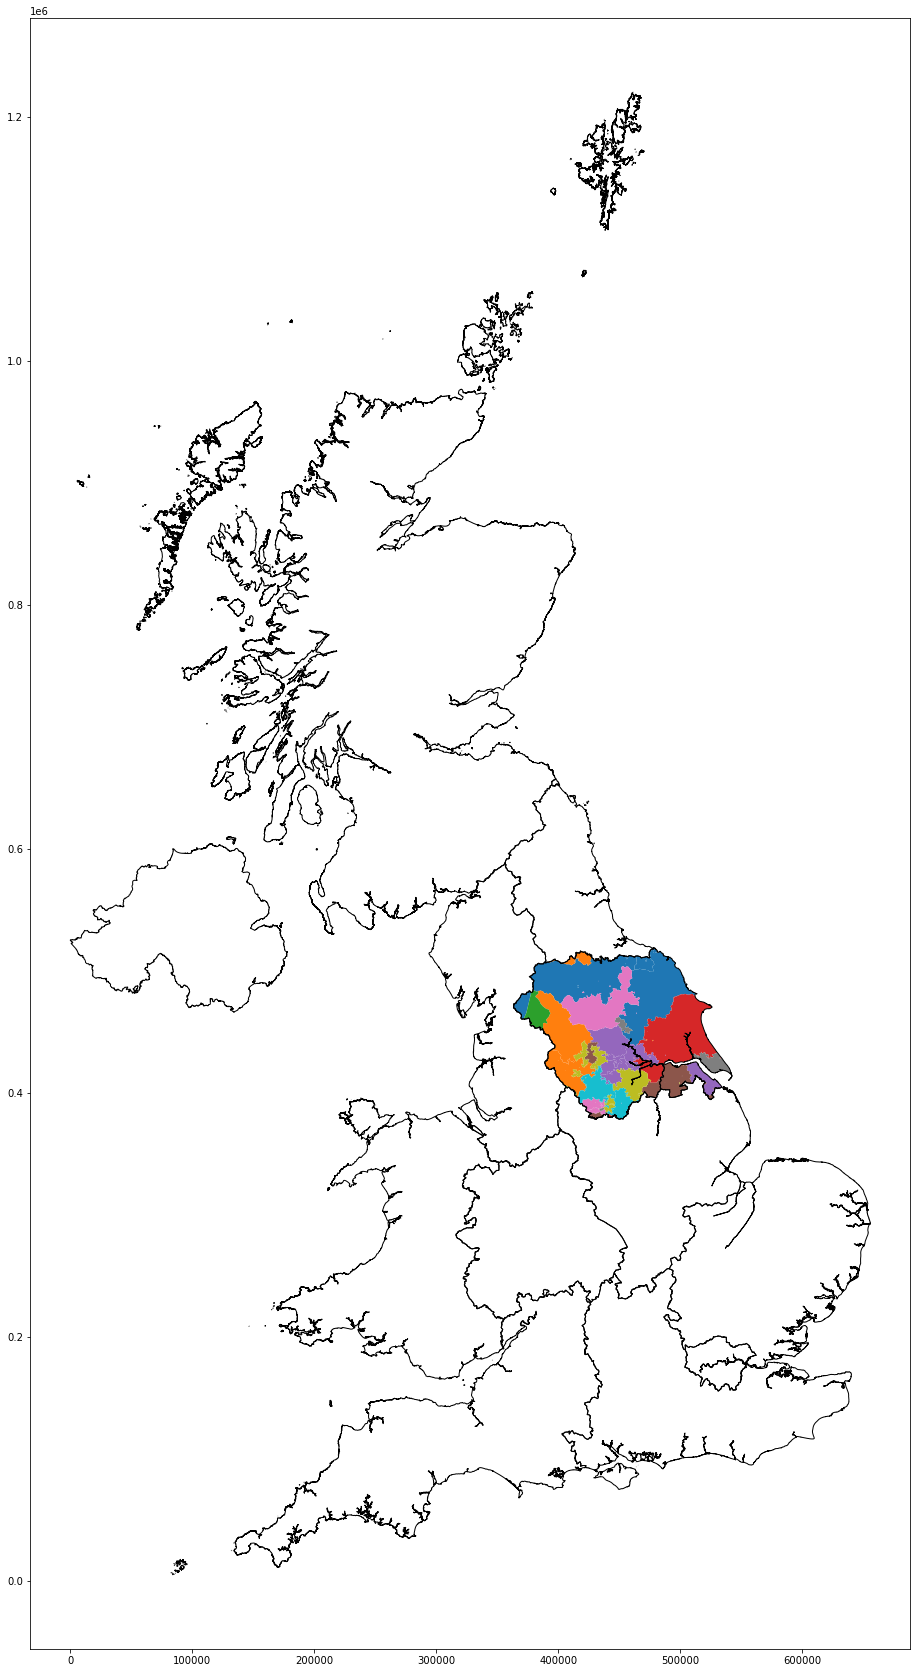

Wales


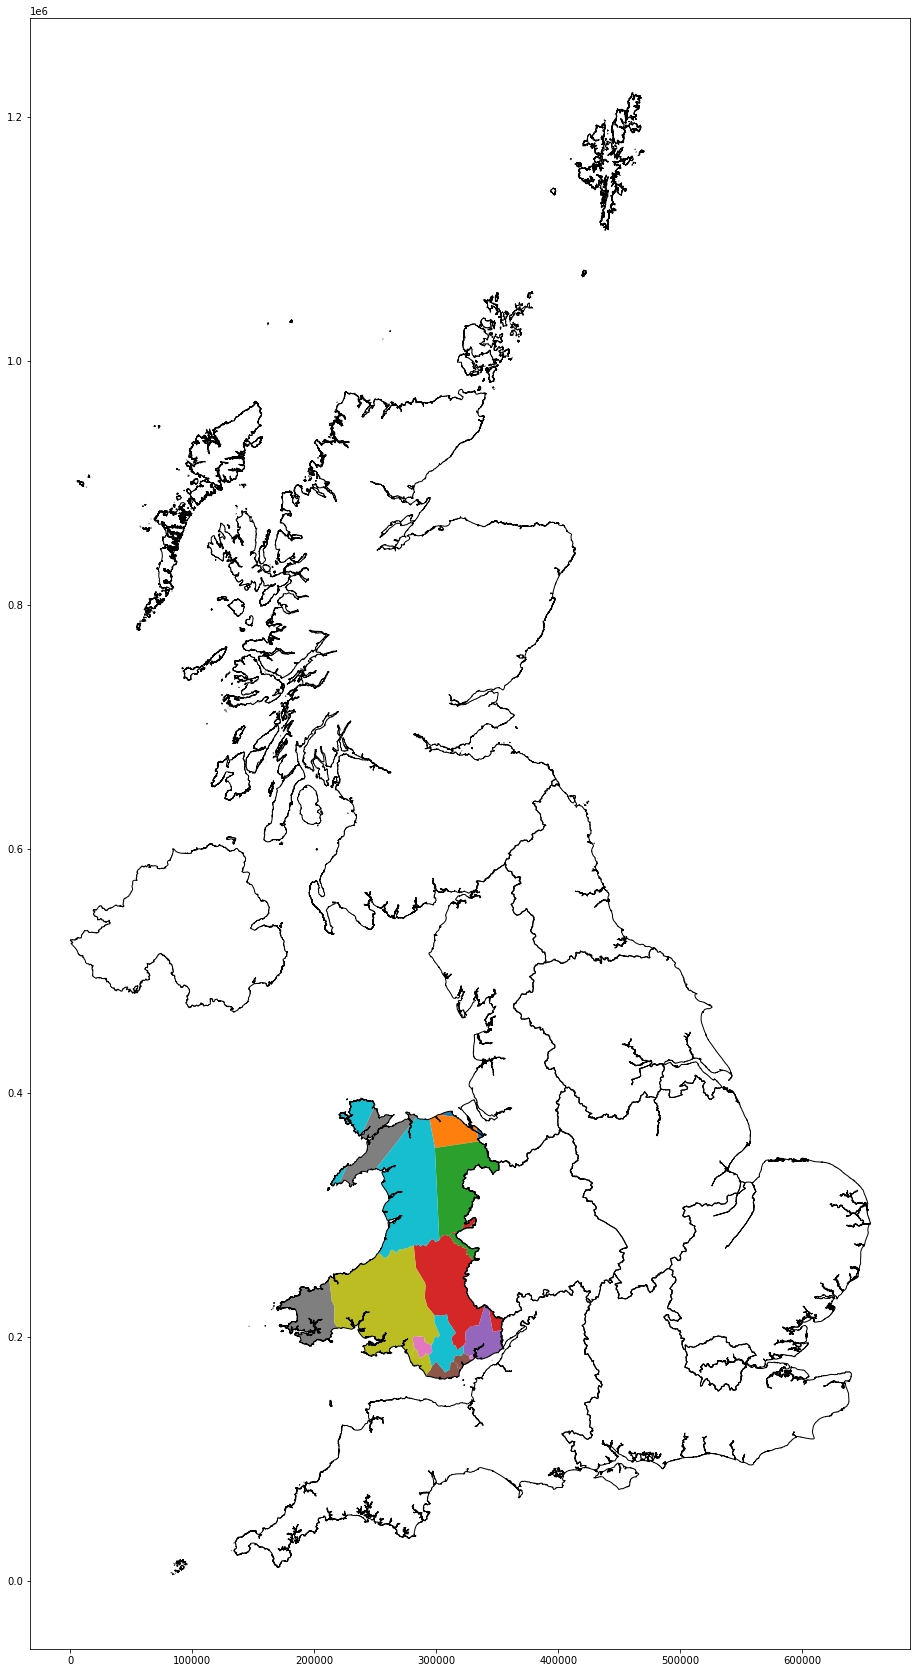

East Midlands (England)


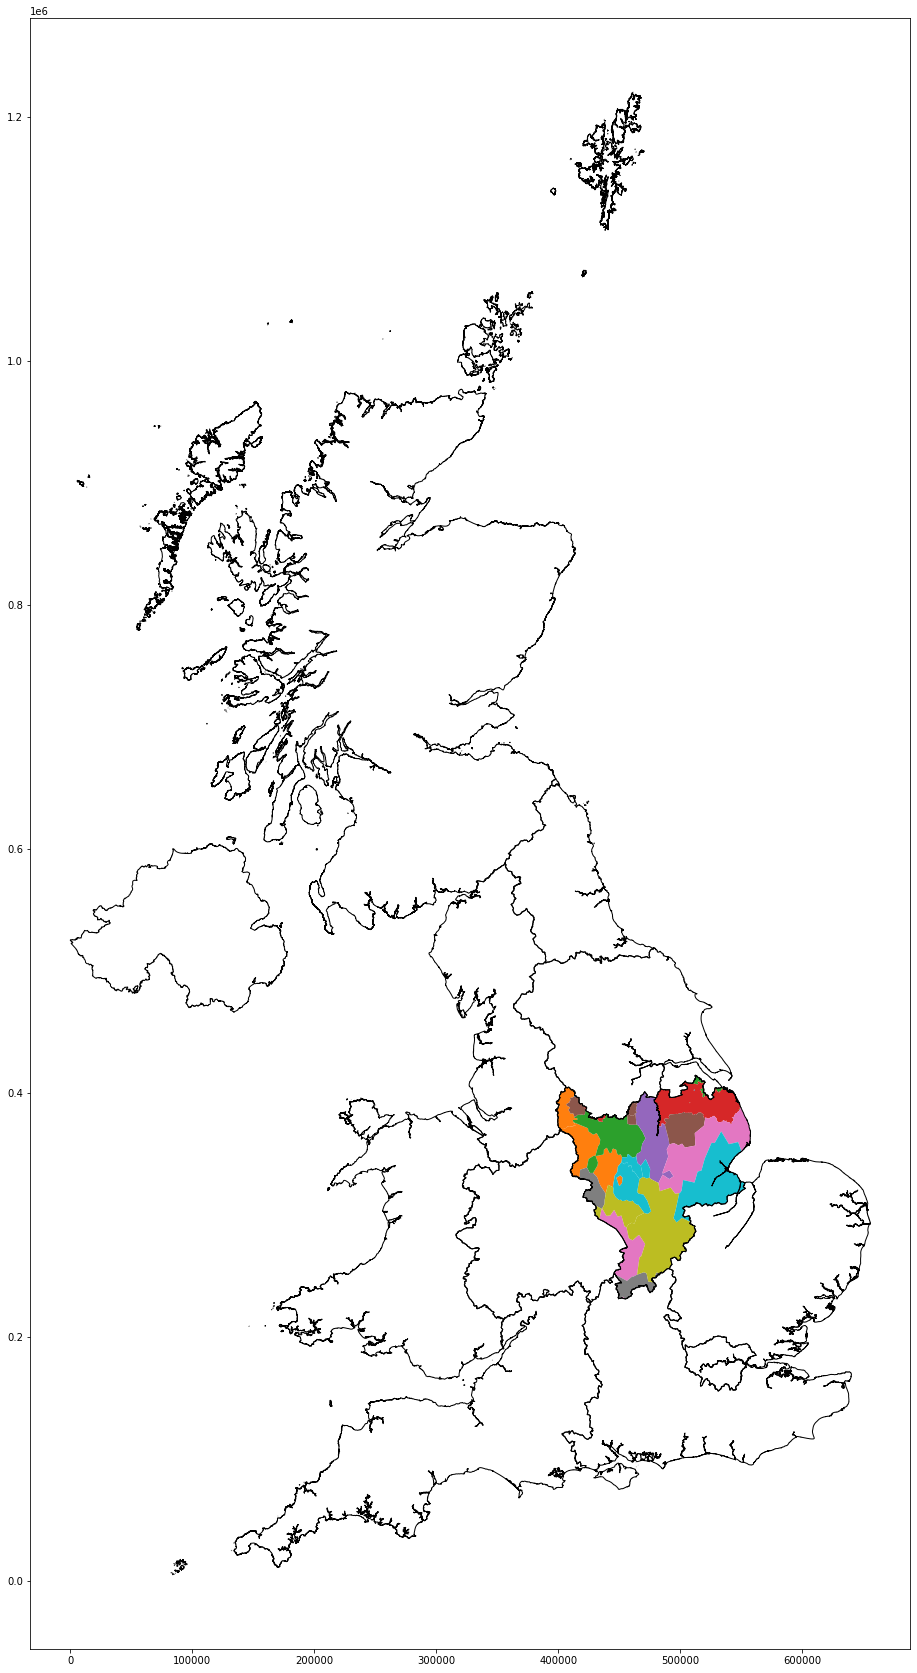

West Midlands (England)


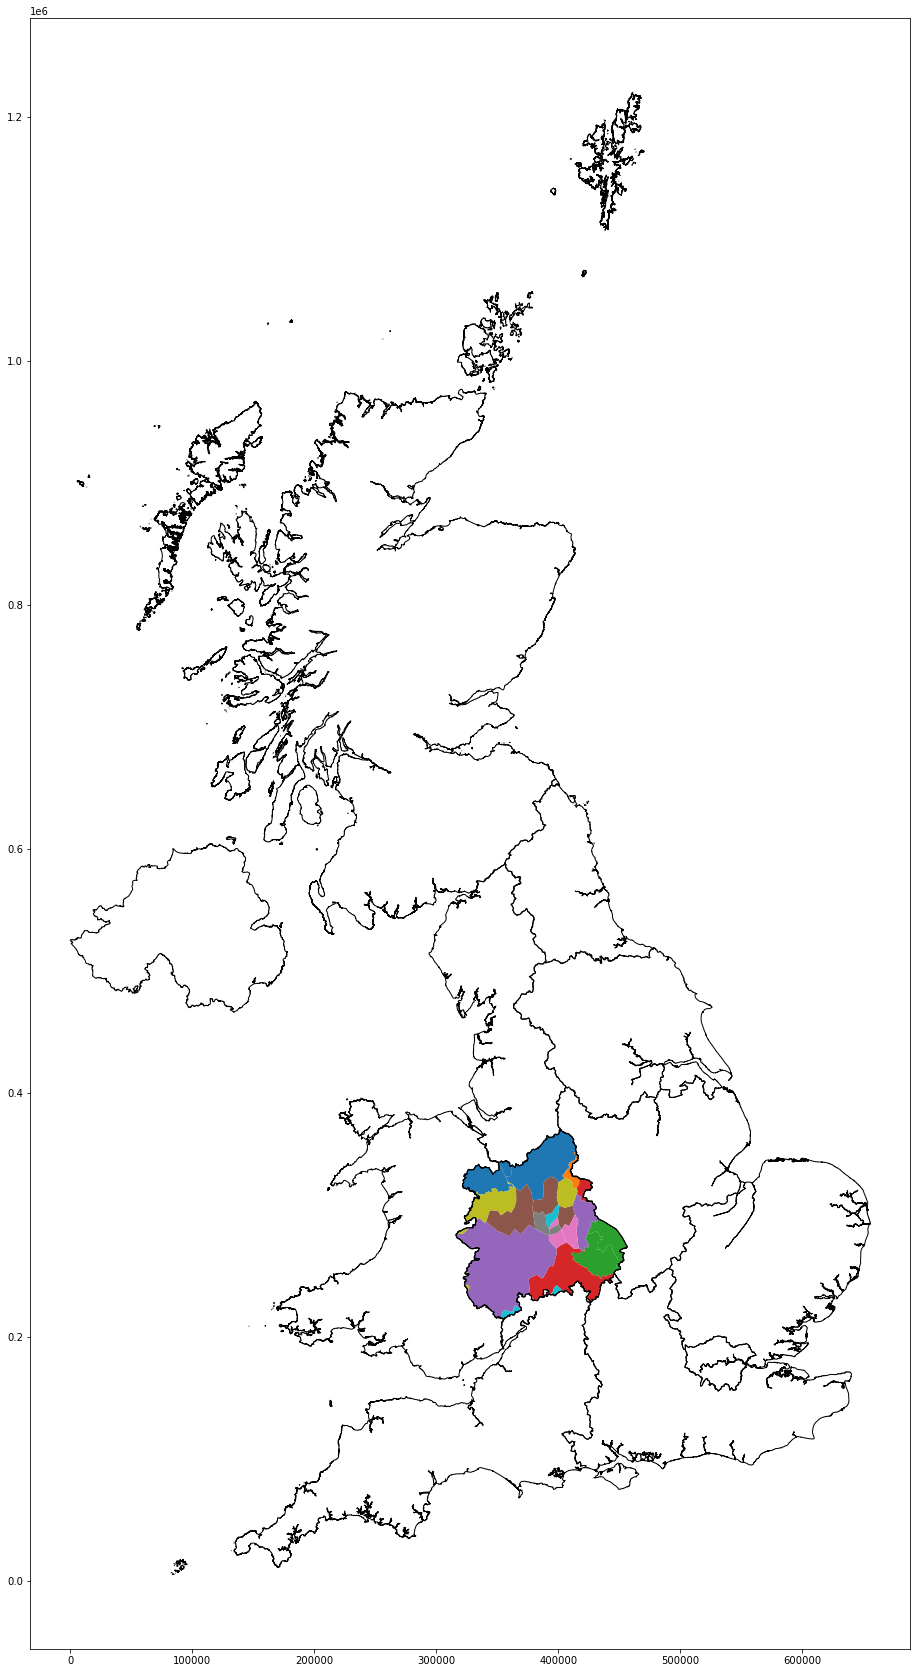

South East (England)


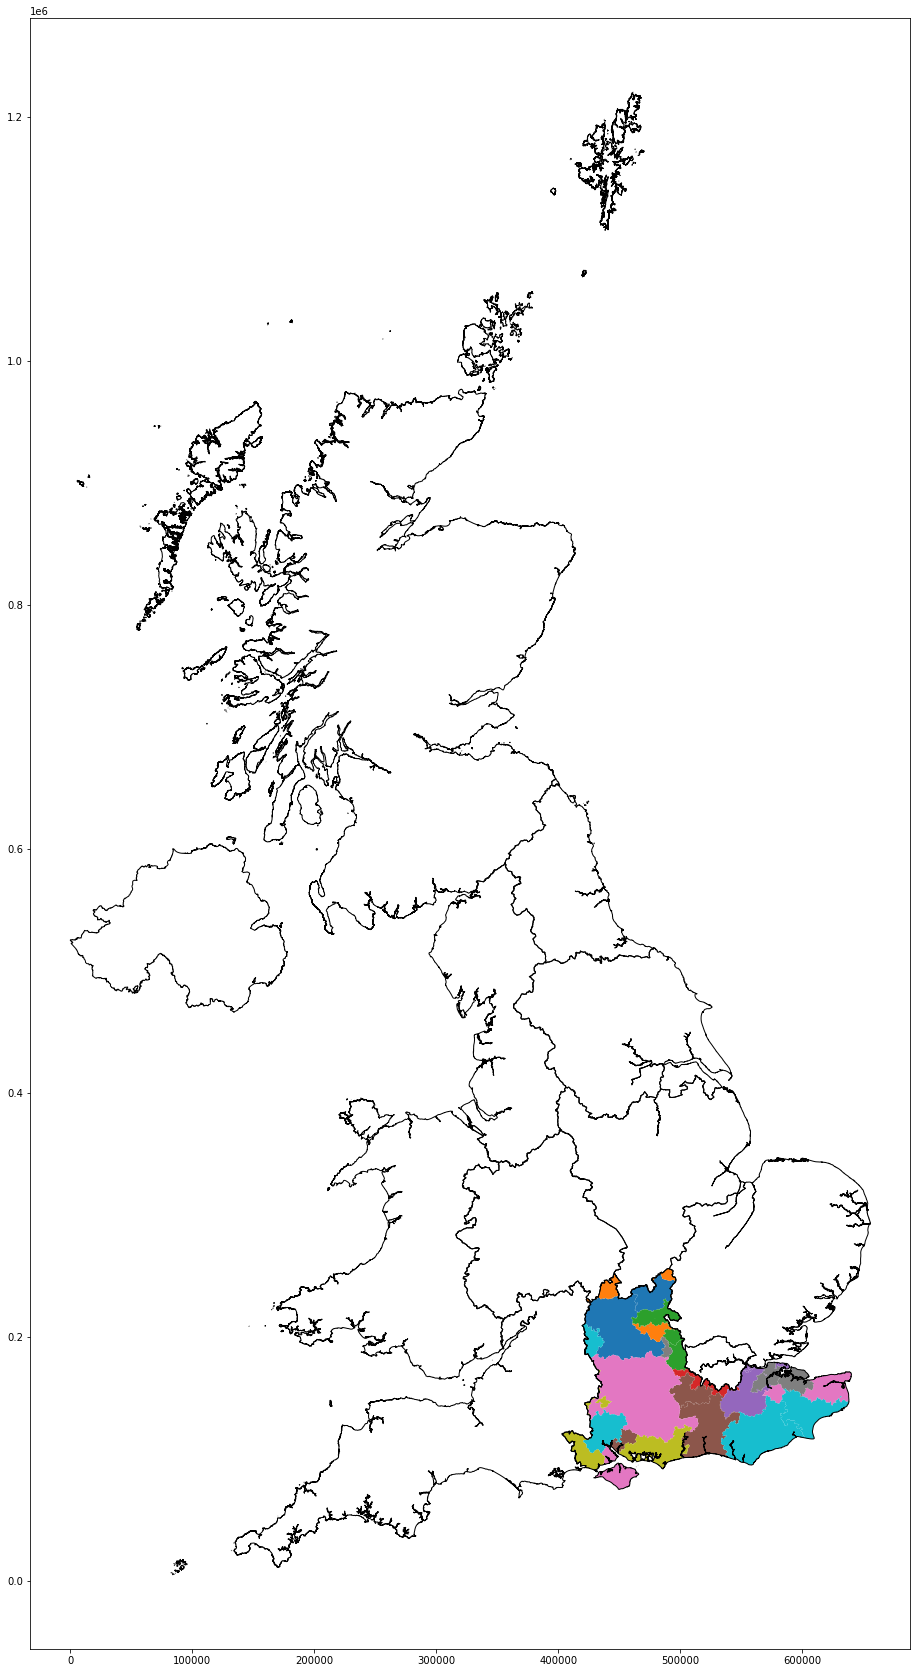

South West (England)


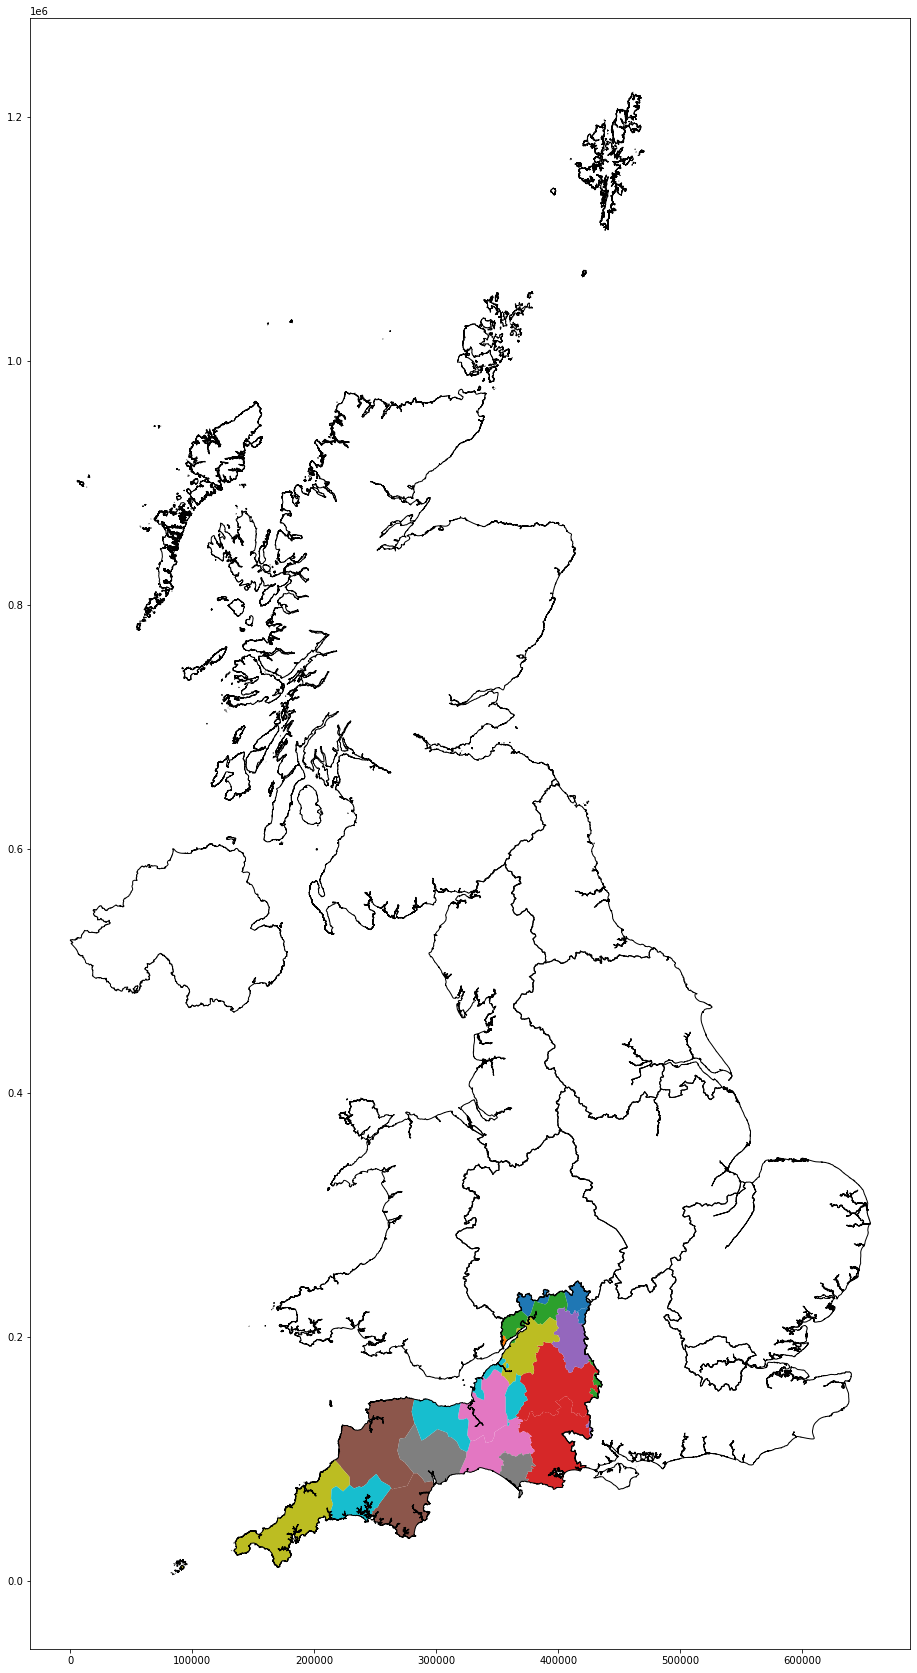

East of England


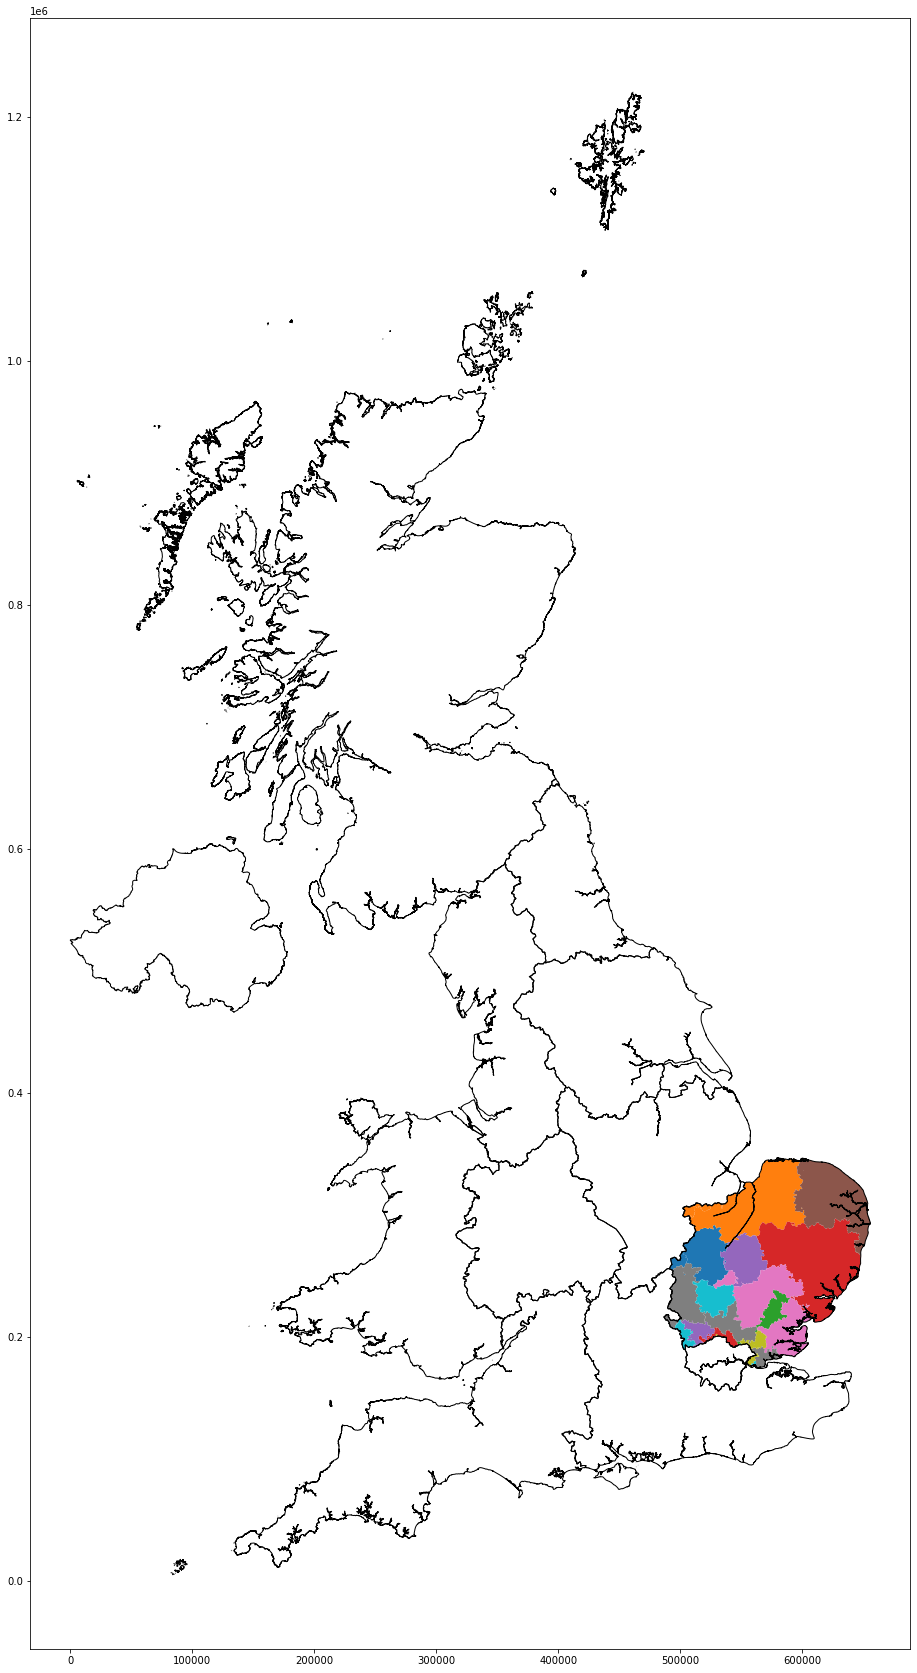

London


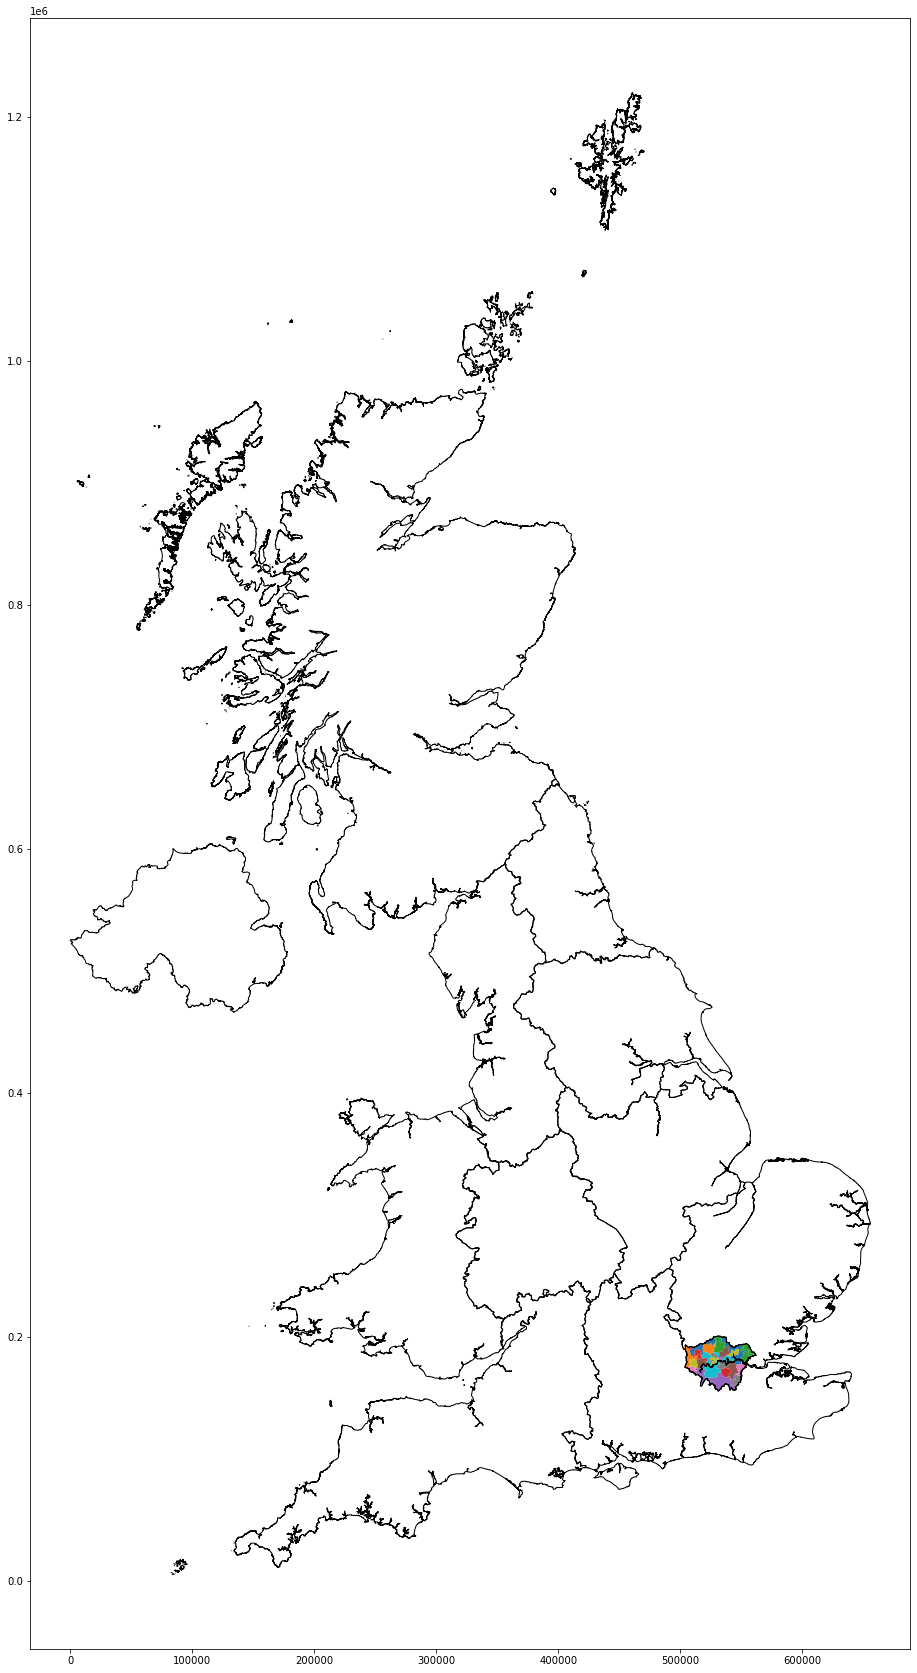

In [17]:
for region in nuts1_regions_list:
    print(region)
    #display(overlaid[overlaid['nuts118nm']==region])
    ax = overlaid[overlaid['nuts118nm']==region].plot(cmap='tab10',figsize=(30,30))
    nuts1['geometry'].plot(ax=ax, facecolor='none', edgecolor='k',figsize=(30,30));
    pyplt.savefig(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\images'+'\\'+region+r'_overlap.png')
    pyplt.show()

In [ ]:
overlaid.head()

In [ ]:
display()

In [ ]:
overlaid2.plot(alpha=0.5, edgecolor='k', cmap='tab10',figsize=(30,30));

In [ ]:
overlaid.columns

In [ ]:
display(overlaid[overlaid['nuts118nm']==r'North East (England)'])

In [ ]:
overlaid[overlaid['nuts118nm']==r'North East (England)'].plot(alpha=0.5, edgecolor='k', cmap='tab10',figsize=(30,30));

In [ ]:
overlaid.plot(alpha=0.5, edgecolor='k', cmap='tab10',figsize=(30,30));

In [ ]:

ax = overlaid['geometry'].plot(facecolor='none',edgecolor='r',figsize=(30,30));
gsp['geometry'].plot(ax=ax, facecolor='none',edgecolor='g',figsize=(30,30));
pyplt.savefig(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\region_overlap.png')

In [ ]:
ax = overlaid[overlaid['nuts118nm']==r'North East (England)'].plot(cmap='tab10',figsize=(30,30))
nuts1['geometry'].plot(ax=ax, facecolor='none', edgecolor='k',figsize=(15,15));
#df2.plot(ax=ax, facecolor='none', edgecolor='k');
#pyplt.savefig(r'C:\Users\jasmine.desmond\Desktop\External_visualisation\region_overlap_v4.png')

In [ ]:
from geopandas.plotting import plot_polygon_collection

fig, ax = pyplt.subplots()
ax.set_aspect('equal')
plot_polygon_collection(ax, overlaid['geometry'], overlaid['Colours'])

In [ ]:
import random 
def generate_colors(n): 
  rgb_values = [] 
  hex_values = [] 
  r = int(random.random() * 256) 
  g = int(random.random() * 256) 
  b = int(random.random() * 256) 
  step = 256 / n 
  for _ in range(n): 
    r += step 
    g += step 
    b += step 
    r = int(r) % 256 
    g = int(g) % 256 
    b = int(b) % 256 
    r_hex = hex(r)[2:] 
    g_hex = hex(g)[2:] 
    b_hex = hex(b)[2:] 
    hex_values.append('#' + r_hex + g_hex + b_hex) 
    rgb_values.append((r,g,b)) 
  return rgb_values, hex_values 
 
color_count = 256 
 
# generate values and print them 
rgb_values, hex_values = generate_colors(256) 
#print (rgb_values, hex_values)
print(hex_values)

In [ ]:
overlaid.shape

In [ ]:
433-256

In [ ]:
rgb_values1,hex_values1 = generate_colors(177)

In [ ]:
hex_values.type

In [ ]:
final_list=hex_values+hex_values1

In [ ]:
len(final_list)

In [ ]:
display(final_list)

In [ ]:
display(overlaid.head())

In [ ]:
overlaid['Colours']=pd.DataFrame(final_list)

In [ ]:
overlaid.head()

In [ ]:
pd.DataFrame(final_list,columns =['Colours'])

In [ ]:
display(hex_values)
display(hex_values1)

In [ ]:
display(hex_values)

In [ ]:
combined=hex_values.append(hex_values1)

In [ ]:
display(combined)

In [ ]:
display(nuts1.columns)
display(gsp.columns)

In [ ]:
#performing sjoin
sjoined=gpd.sjoin(nuts1,gsp)

In [ ]:
display(sjoined.columns)

In [ ]:
#dropping duplicates based on these 3 columns
sjoined.drop_duplicates(subset=['nuts118nm','RegionName','geometry'],inplace=True)

In [ ]:
#calculating areas
sjoined['area']=sjoined['geometry'].area

In [ ]:
display(sjoined[['nuts118nm','RegionName','area']])

In [ ]:
#calculating total area for each gsp
grouped=sjoined.groupby(['RegionName'],as_index=False)['area'].sum()

In [ ]:
#merging with the area totals
merged=sjoined.merge(grouped, on='RegionName', suffixes=('_individual', '_total'))

In [ ]:
#calculating the proportion of the gsp in a particular nuts1 area
merged['proportion']=merged['area_individual']/merged['area_total']

In [ ]:
gsp['area']=gsp['geometry'].area
checking_areas=gsp.merge(grouped, on='RegionName', suffixes=('_before', '_after'))
display(checking_areas)

In [ ]:
small=merged[['nuts118nm','RegionName','proportion']]

In [ ]:
small=small.round({'proportion': 4})

In [ ]:
display(small)

In [ ]:
display(d)

In [ ]:
#displaying nuts shapefile data
nuts1=gpd.read_file(r'C:\Users\jasmine.desmond\Desktop\NUTS_Level_1_(January_2018)_Boundaries\NUTS_Level_1_(January_2018)_Boundaries.shp')
display(nuts1.shape)
display(nuts1)

In [ ]:
#displaying gsp shapefile data
gsp=gpd.read_file(r'C:\Users\jasmine.desmond\Desktop\gsp_regions_20181031\GSP_regions_20181031.shp')
display(gsp.shape)
display(gsp)

In [ ]:
#sjoin - type inner
test=gpd.sjoin(nuts1,gsp)
display(test.shape)
display(test[['nuts118nm','RegionName']])

In [ ]:
#sjoin - type: right
test2=gpd.sjoin(nuts1,gsp, how='right')
display(test2.shape)
display(test2[['nuts118nm','RegionName']])

In [ ]:
#checking number of unique RegionNames in the output dataframe
unique_values=test['RegionName'].unique()
unique_values=pd.DataFrame(unique_values)
display(unique_values.shape)
display(unique_values)

In [ ]:
#checking number of unique RegionNames in the gsp shape dataframe
unique_values1=pd.DataFrame(gsp['RegionName'].unique())
display(unique_values1.shape)
display(unique_values1)

In [ ]:
#looking what values are duplicated in the gsp shape dataframe
gsp['RegionName'][gsp['RegionName'].duplicated()]

In [ ]:
#looking what values are duplicated in the gsp shape dataframe
temp=gsp[gsp[['RegionName','RegionID']].duplicated(keep=False)]
temp=temp.sort_values(by='RegionName')
display(temp)

In [ ]:
#any duplicated considering entire gsp dataframe
gsp[gsp.duplicated(keep=False)]

In [ ]:
#GSPs that are split between more than one NUTS1 region
temp1=test[['nuts118nm','RegionName','geometry']][test[['RegionName']].duplicated(keep=False)]

In [ ]:
temp1=test[['nuts118nm','RegionName','geometry']][test[['nuts118nm','RegionName']].duplicated(keep=False)]

In [ ]:
temp1=temp1.sort_values(by='RegionName')

In [ ]:
temp1=temp1[['nuts118nm','RegionName','geometry']].drop_duplicates()

In [ ]:
display(temp1)

In [ ]:
temp1['area']=temp1['geometry'].area

In [ ]:
grouped=temp1.groupby(['RegionName'],as_index=False).sum()

In [ ]:
display(grouped)

In [ ]:
merged=temp1.merge(grouped, on='RegionName', suffixes=('_individual', '_total'))

In [ ]:
merged['proportion']=merged['area_individual']/merged['area_total']
merged.head()

In [ ]:
temp1

In [ ]:
#GSPs that are 100% in one particular NUTS1 region
test[['nuts118nm','RegionName']][~test['RegionName'].duplicated(keep=False)]